# Задача №1 ⏰ :
Найти :
* долю всех задержек ко всем вылетам (пункт 1);
-зависимость количества задержек от длины пути, который предстоит пролететь самолёту (пункт 2);
-топ 5 направлений, для которых чаще всего происходят задержки
-в какие времена года чаще всего происходят задержки рейсов (пункт 3);
-топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы (пункт 4);
-топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки (пункт 5);
-необычную зависимость количества задержек от имеющихся данных (пункт 6).



In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df1 = pd.read_csv('flight_delays.csv')
df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934.0,AA,ATL,DFW,732.0,N
1,c-4,c-20,c-3,1548.0,US,PIT,MCO,834.0,N
2,c-9,c-2,c-5,1422.0,XE,RDU,CLE,416.0,N
3,c-11,c-25,c-6,1015.0,OO,DEN,MEM,872.0,N
4,c-10,c-7,c-6,1828.0,WN,MDW,OMA,423.0,Y


In [ ]:
st = df1.shape[0]

# Пункт 1

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

задержки: 19.0 %
вылеты без задержки: 81.0 %


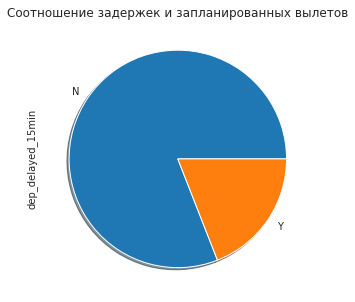

In [ ]:
print('задержки:', round(df1['dep_delayed_15min'].value_counts(normalize=True)[1], 2)*100,'%')
print('вылеты без задержки:', round(df1['dep_delayed_15min'].value_counts(normalize=True)[0], 2)*100,'%')
df1['dep_delayed_15min'].value_counts(normalize=True).plot(kind = 'pie', figsize=(5,5), shadow = True)
plt.title('Соотношение задержек и запланированных вылетов');

где y - задержки, N - плановые вылеты 

# Пункт 2

In [ ]:
df1[(df1['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()

,Distance
600.0,1
56.0,1
30.0,1
41.0,1
1864.0,1
...,...
733.0,30
337.0,30
403.0,30
236.0,31


In [ ]:
df = df1[(df1['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()
df2 = pd.DataFrame({'Distance' : df.index, 'number' : df['Distance'].values})

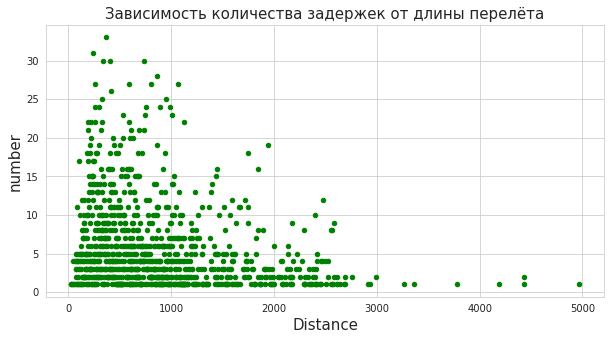

In [ ]:
df2.plot.scatter(x = 'Distance', y = 'number', c ='green', figsize = (10, 5));
plt.title('Зависимость количества задержек от длины перелёта', fontsize = 15);
plt.xlabel('Distance', fontsize = 15)
plt.ylabel('number', fontsize = 15)
plt.show()

# Пункт 3

In [ ]:
df.head()

,Distance
600.0,1
56.0,1
30.0,1
41.0,1
1864.0,1


In [ ]:
df3 = df1[(df1['dep_delayed_15min'] == 'Y')][['Origin', 'Dest']].value_counts(ascending=False).to_frame()
df3.head(10)

,,0
Origin,Dest,
ATL,LAX,17
ORD,LGA,16
LAS,LAX,16
DFW,ORD,16
LAX,LAS,15
LGA,ORD,14
SFO,SEA,13
ATL,EWR,13
MCO,ATL,13


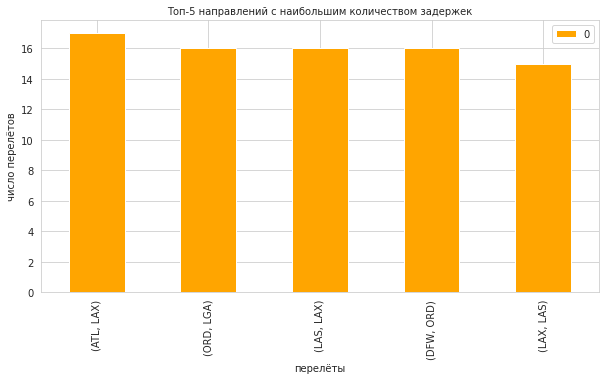

In [ ]:
df3.head(5).plot.bar(figsize = (10, 5), color = 'orange', label = 'количество перелётов')
plt.title('Топ-5 направлений с наибольшим количеством задержек', fontsize = 10);
plt.xlabel('перелёты', fontsize = 10)
plt.ylabel('число перелётов', fontsize = 10)
plt.show()

# Пункт 4

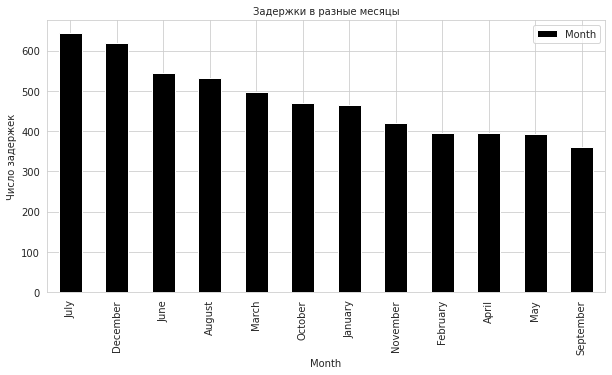

In [ ]:
df4 = df1[(df1['dep_delayed_15min'] == 'Y')].replace(
    {'Month' : {'c-1':'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June',
                'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})
                    
df4_new = df4['Month'].value_counts(ascending=False).to_frame()
df4_new.plot.bar(figsize = (10, 5), color = 'black')
plt.title('Задержки в разные месяцы', fontsize = 10);
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Число задержек', fontsize = 10)
plt.show()

# Пункт 5

P.S. возьмем за основу сравнение соотношений кол-ва рейсов с задержкой и без задержки.

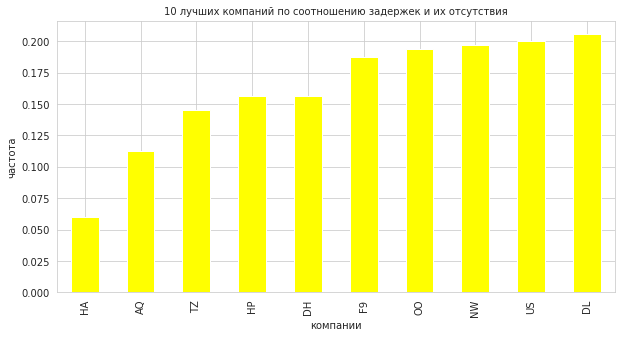

In [ ]:
No = df1[(df1['dep_delayed_15min'] == 'N')]['UniqueCarrier'].value_counts(ascending=False)
Yes = df1[(df1['dep_delayed_15min'] == 'Y')]['UniqueCarrier'].value_counts(ascending=False)
x = Yes/No
df5 = x.sort_values(ascending=True).iloc[0:10]
df5.plot.bar(figsize = (10, 5), color = 'yellow')
plt.title('10 лучших компаний по соотношению задержек и их отсутствия', fontsize = 10);
plt.xlabel('компании', fontsize = 10)
plt.ylabel('частота', fontsize = 10)
plt.show()

In [ ]:
print(df1['UniqueCarrier'].value_counts(ascending=False))

WN    4564
AA    2905
DL    2517
MQ    2227
OO    2198
UA    2036
NW    1944
US    1877
XE    1773
OH    1422
CO    1323
EV    1155
FL     912
AS     618
YV     616
B6     521
HP     437
F9     304
DH     288
HA     211
TZ     134
AQ      79
Name: UniqueCarrier, dtype: int64


# Пункт 6

In [ ]:
No_1 = df1[(df1['dep_delayed_15min'] == 'N')]['Origin'].value_counts(ascending=False)
Yes_1 = df1[(df1['dep_delayed_15min'] == 'Y')]['Origin'].value_counts(ascending=False)
x_1 = Yes_1/No_1
df6 = x_1.sort_values(ascending=False).iloc[0:10]

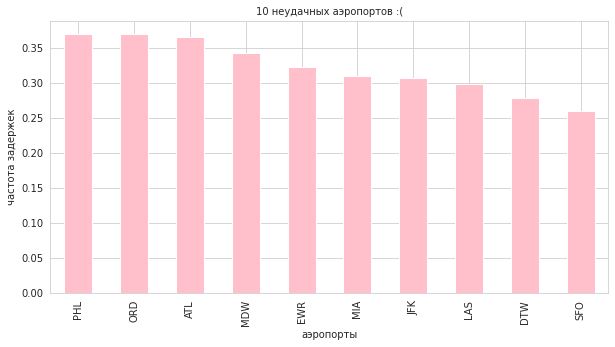

In [ ]:
No_1_100 = No_1[No_1 > 100] #чтобы хоть как-то усреднить кол-во полетов, иначе будем рассматривать и маленькое кол-во вылетов, на таких малых количествах попыток большую роль могла сыграть случайность, судя всего по паре полетов.  
Yes_1_100 = Yes_1
x_1_100 = Yes_1_100/No_1_100
df6_100 = x_1_100.sort_values(ascending=False).iloc[0:10]
df6_100
df6_100.plot.bar(figsize = (10, 5), color = 'pink')
plt.title('10 неудачных аэропортов :(', fontsize = 10);
plt.xlabel('аэропорты', fontsize = 10)
plt.ylabel('частота задержек', fontsize = 10)
plt.show()

# Пункт 7

проверим корреляцию между общим временем вылета и дистанцией (можем оценить например в какое время чаще вылетают самолеты на длинные дистанции), а также днем недели (можем посмотреть в какие дни недели более популярны утренние, а когда вечерние).
 

* Первая догадка (время-дистанция): чтобы пилот был
более внимателен и было светло и ясно, длинные рейсы начинать в утро-день.


* Вторая догадка (день-время): в пятницу вечером после работы можно улететь, а в воскресенье вечером прилететь.





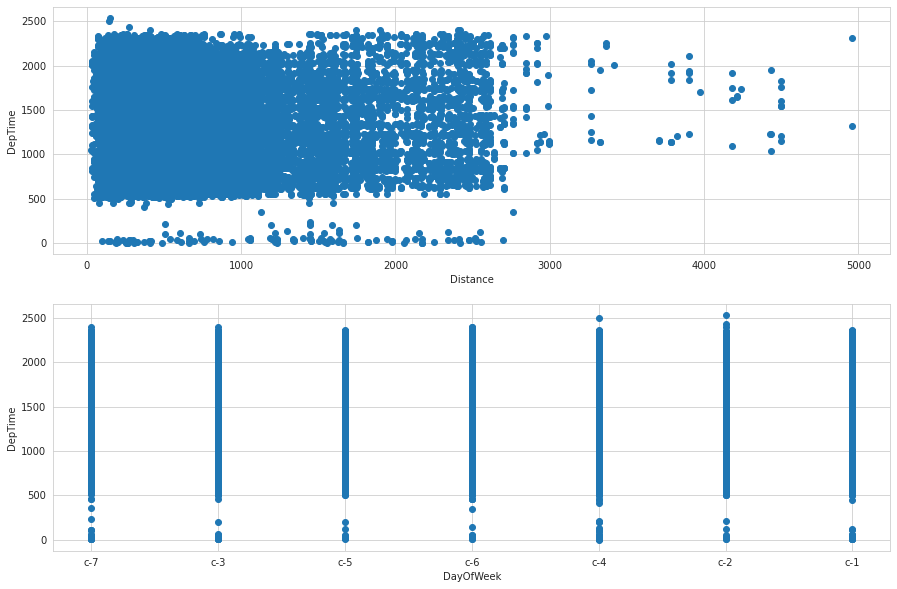

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('flight_delays.csv')

fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0].scatter(x = df['Distance'], y = df['DepTime'])
ax[0].set_xlabel("Distance")
ax[0].set_ylabel("DepTime")

ax[1].scatter(x = df['DayOfWeek'], y = df['DepTime'])
ax[1].set_xlabel("DayOfWeek")
ax[1].set_ylabel("DepTime")

plt.show()

Первая догадка отчасти верна, на длинные дистанции - популярно дневное время. Возможны поправки на часовой пояс страны в которую вылет).

Второй результат говорит нам о наимньшей занятости и нагруженности работы аэропорта с 3 до 5 часов утра.